In [77]:
import pandas as pd
import numpy as np
from sklearn.linear_model import BayesianRidge
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import mean_squared_error, r2_score

# Bayesian Ridge Regression

Se realiza un entrenamiento con una regresión bayesiana de ridge, realizando una transformación en la variable objetivo SalesPrice a log, para que sea más cercana a una gassiana y de esta manera manera ser consecuentes con las suposiciones del modelo y además obteniendo un mejor resultado.

In [78]:
# Your selected columns
selected_num_columns = ['LotFrontage', 'LotArea', 'TotalBsmtSF', 'GrLivArea', 'SalePrice']
categorical_columns_filtered = ['Street', 'LandContour', 'LandSlope', 'Utilities', 'Neighborhood',
                                  'Condition1', 'Condition2', 'HouseStyle', 'BldgType', 'OverallQual',
                                  'OverallCond', 'RoofStyle', 'Exterior1st', 'ExterCond', 'BsmtCond',
                                  'BsmtFinType1', 'CentralAir', 'Heating', 'KitchenQual',
                                  'TotRmsAbvGrd', 'GarageType', 'GarageCond', 'PavedDrive',
                                  'SaleType', 'SaleCondition', 'Fireplaces', 'GarageCars']

categorical_columns_filtered = [ 'LandSlope',  'Neighborhood',
                                  'Condition1',  'HouseStyle', 'BldgType', 'OverallQual',
                                  'OverallCond', 'RoofStyle', 'Exterior1st', 'ExterCond', 'BsmtCond',
                                  'BsmtFinType1', 'KitchenQual',
                                  'TotRmsAbvGrd', 'GarageType',  'PavedDrive',
                                  'SaleType', 'SaleCondition', 'Fireplaces', 'GarageCars']

In [79]:
train_set = pd.read_csv('../data/train.csv')
test_set = pd.read_csv('../data/test.csv')

In [80]:
for column in categorical_columns_filtered[3:]:
    print(train_set[column].value_counts())
    

HouseStyle
1Story    726
2Story    445
1.5Fin    154
SLvl       65
SFoyer     37
1.5Unf     14
2.5Unf     11
2.5Fin      8
Name: count, dtype: int64
BldgType
1Fam      1220
TwnhsE     114
Duplex      52
Twnhs       43
2fmCon      31
Name: count, dtype: int64
OverallQual
5     397
6     374
7     319
8     168
4     116
9      43
3      20
10     18
2       3
1       2
Name: count, dtype: int64
OverallCond
5    821
6    252
7    205
8     72
4     57
3     25
9     22
2      5
1      1
Name: count, dtype: int64
RoofStyle
Gable      1141
Hip         286
Flat         13
Gambrel      11
Mansard       7
Shed          2
Name: count, dtype: int64
Exterior1st
VinylSd    515
HdBoard    222
MetalSd    220
Wd Sdng    206
Plywood    108
CemntBd     61
BrkFace     50
WdShing     26
Stucco      25
AsbShng     20
BrkComm      2
Stone        2
AsphShn      1
ImStucc      1
CBlock       1
Name: count, dtype: int64
ExterCond
TA    1282
Gd     146
Fa      28
Ex       3
Po       1
Name: count, dtype: int6

In [81]:
# Define the target and features
# SalePrice is the target, so exclude it from features.
numeric_features = [col for col in selected_num_columns if col != 'SalePrice']
X = train_set[[col for col in selected_num_columns if col != 'SalePrice'] + categorical_columns_filtered]
train_set['SalePrice_log'] = np.log1p(train_set['SalePrice'])
y = train_set['SalePrice_log']

In [82]:
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

# Preprocessing for categorical features: imputation and one-hot encoding
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore', sparse_output=False))
])

# Combine numeric and categorical transformations using ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_columns_filtered)
    ]
)



In [83]:

# Create a pipeline with the preprocessor and the Bayesian Ridge regressor
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('br', BayesianRidge())
])

In [84]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [85]:
param_grid = {
    'br__alpha_1': [1e-6, 1e-5, 1e-4],
    'br__lambda_1': [1e-6, 1e-5, 1e-4]
}

In [86]:
grid_search = GridSearchCV(
    pipeline,
    param_grid,
    cv=5,
    scoring='neg_mean_squared_error',  # using negative MSE as the metric
    n_jobs=-1
)



In [87]:
print(pipeline.get_params().keys())

dict_keys(['memory', 'steps', 'verbose', 'preprocessor', 'br', 'preprocessor__force_int_remainder_cols', 'preprocessor__n_jobs', 'preprocessor__remainder', 'preprocessor__sparse_threshold', 'preprocessor__transformer_weights', 'preprocessor__transformers', 'preprocessor__verbose', 'preprocessor__verbose_feature_names_out', 'preprocessor__num', 'preprocessor__cat', 'preprocessor__num__memory', 'preprocessor__num__steps', 'preprocessor__num__verbose', 'preprocessor__num__imputer', 'preprocessor__num__scaler', 'preprocessor__num__imputer__add_indicator', 'preprocessor__num__imputer__copy', 'preprocessor__num__imputer__fill_value', 'preprocessor__num__imputer__keep_empty_features', 'preprocessor__num__imputer__missing_values', 'preprocessor__num__imputer__strategy', 'preprocessor__num__scaler__copy', 'preprocessor__num__scaler__with_mean', 'preprocessor__num__scaler__with_std', 'preprocessor__cat__memory', 'preprocessor__cat__steps', 'preprocessor__cat__verbose', 'preprocessor__cat__impute

In [88]:
X_train

,LotFrontage,LotArea,TotalBsmtSF,GrLivArea,LandSlope,Neighborhood,Condition1,HouseStyle,BldgType,OverallQual,...,BsmtCond,BsmtFinType1,KitchenQual,TotRmsAbvGrd,GarageType,PavedDrive,SaleType,SaleCondition,Fireplaces,GarageCars
254,70.0,8400,1314,1314,Gtl,NAmes,Norm,1Story,1Fam,5,...,TA,Rec,TA,5,Attchd,Y,WD,Normal,0,1
1066,59.0,7837,799,1571,Gtl,Gilbert,Norm,2Story,1Fam,6,...,TA,Unf,TA,7,Attchd,Y,WD,Normal,1,2
638,67.0,8777,796,796,Gtl,Edwards,Feedr,1Story,1Fam,5,...,TA,Unf,TA,4,NaN,P,WD,Normal,0,0
799,60.0,7200,731,1768,Gtl,SWISU,Feedr,1.5Fin,1Fam,5,...,TA,ALQ,Gd,7,Detchd,Y,WD,Normal,2,1
380,50.0,5000,1026,1691,Gtl,SWISU,Norm,1.5Fin,1Fam,5,...,TA,LwQ,Gd,6,Detchd,Y,WD,Normal,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1095,78.0,9317,1314,1314,Gtl,CollgCr,Norm,1Story,1Fam,6,...,TA,GLQ,Gd,6,Attchd,Y,WD,Normal,1,2
1130,65.0,7804,1122,1981,Gtl,SWISU,Norm,1.5Fin,1Fam,4,...,TA,BLQ,Gd,7,Detchd,Y,WD,Normal,2,2
1294,60.0,8172,864,864,Gtl,Edwards,Norm,1Story,1Fam,5,...,TA,Rec,TA,5,Detchd,N,WD,Normal,0,2
860,55.0,7642,912,1426,Gtl,Crawfor,Norm,1.5Fin,1Fam,7,...,TA,Unf,Gd,7,Detchd,Y,WD,Normal,1,1


In [89]:
# Fit grid search on the training data
grid_search.fit(X_train, y_train)
# Output the best hyperparameters and score
print("Best parameters:", grid_search.best_params_)
print("Best negative MSE (CV):", grid_search.best_score_)

Best parameters: {'br__alpha_1': 1e-06, 'br__lambda_1': 0.0001}
Best negative MSE (CV): -0.02261946229579436


In [91]:
y_pred = grid_search.predict(X_test)
mse_test = mean_squared_error(y_test, y_pred)
r2_test = r2_score(y_test, y_pred)
print("Test MSE:", mse_test)
print("Test R2:", r2_test)

Test MSE: 0.019776244308768426
Test R2: 0.8940242240915343


In [92]:
import matplotlib.pyplot as plt

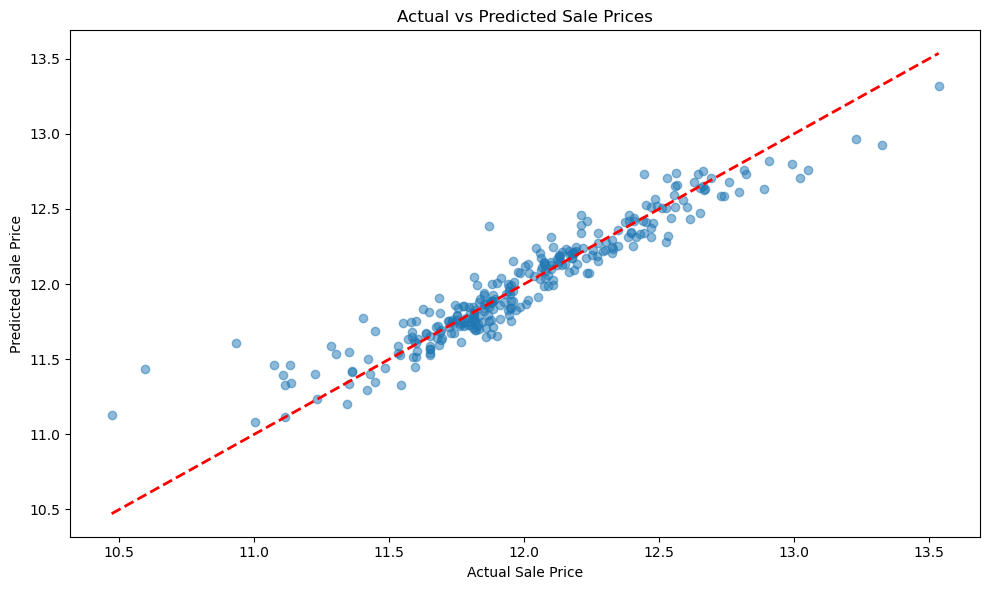

In [93]:
# Feature importance plot using the best model

# Scatter plot of predicted vs actual values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual Sale Price')
plt.ylabel('Predicted Sale Price')
plt.title('Actual vs Predicted Sale Prices')
plt.tight_layout()
plt.show()

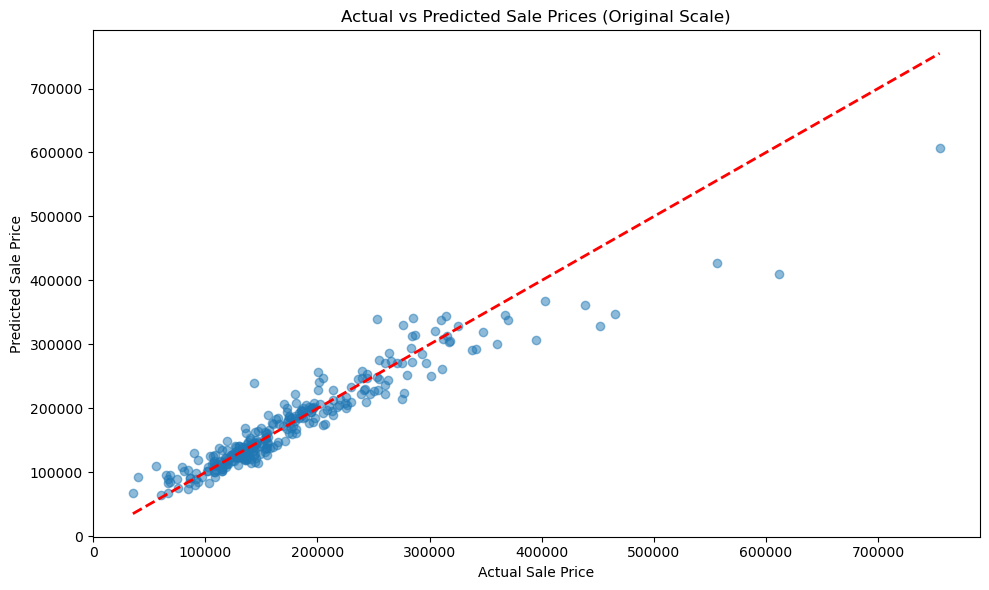

In [94]:
# Assuming y_test and y_pred are the log-transformed values:
y_test_orig = np.expm1(y_test)  # Convert back to original scale
y_pred_orig = np.expm1(y_pred)

plt.figure(figsize=(10, 6))
plt.scatter(y_test_orig, y_pred_orig, alpha=0.5)
plt.plot([y_test_orig.min(), y_test_orig.max()], [y_test_orig.min(), y_test_orig.max()], 'r--', lw=2)
plt.xlabel('Actual Sale Price')
plt.ylabel('Predicted Sale Price')
plt.title('Actual vs Predicted Sale Prices (Original Scale)')
plt.tight_layout()
plt.show()